# Lab 03

### Grad. Communications Lab :: ECEN 4652

##### Maurice Woods

##### 10 February 2017

-----------------

Problem statements are outlined below...
> And answers to questions are indented into "quote" blocks

In [3]:
from pylab import *
import numpy as np

-------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------
### E01 - Install GNU Radio and Try it Out
##### Part A)
Install a Virtual Machine, Install Ubuntu, and Install GNU Radio

> I have installed GNU Radio inside of my previously-installed VM Virtualbox instance of Ubuntu Linux 16.04 LTS (x86-64)

##### Part B)
Try out GNU Radio; Explore signal addition, multiplication, and Frequency/Time Domain Displays

> ##### 1.1 - Getting Started with the GNU Radio Companion
> Signal Source and Throttle blocks added to the workspace
>
> See example001.grc to view the flowspace created for this exercise
>![1.1](1part1.png)

> ##### 1.2 - A Cosine Waveform Generator in the GNU Radio Companion
>
> See example002.grc to view the flowspace created for this exercise
>![1.2](1part2.png)

> ##### 1.3  - A Cosine Waveform Generator with Variable Frequency and Sound
>
> See example002.grc to view the flowspace created for this exercise
> ![1.3](1part3.png)
>
> ###### Do you hear a difference in the sound played when frequency is negative compared to the sound of the same positive frequency?
> I do not hear a difference between negative and positive frequencies, which is to be expected because the production of sound only depends on the absolute value of the frequency of the wave in question.

> ##### 1.4 - More General Waveform Generator with Variable Frequency and Offset
>
> See example003.grc to view the flowspace created for this exercise
>![1.4](1part4.png)

> ##### 1.5 - Generating a Waveform Using a Vector Source
>
> See example004.grc to view the flowspace created for this exercise
>![1.5](1part5.png)

> ##### 1.6 - Using a Lowpass Filter
>
>See example005.grc to view the flowspace created for this exercise
>![1.6](1part6.png)

> ##### 1.7 - Complex-Valued Waveform Generator
> 
> ![1.7.1](1part7_1.png)
> ![1.7.2](1part7_2.png)
>
> And for a triangle wave...
> ![1.7.3](1part7_3.png)
> ###### Explain why there are no spectral lines at ...-5,-1,3,7...
> First, it is important to note that the spectrum lines of the triangle wave only occur on odd-numbered frequencies. This is becasue the triangle wave, like the sine wave, is an odd function, and is therefore only build from odd (sine) components. The reason that every other odd frequency is skipped (which is NOT mirrored across f0 = 0Hz) is based on the inclusion of the complex-valued part of the triangle wave. as seen in the next screenshot, using only the real part of the triangle wave's signal makes the triangle wave's Fourier spectrum symetric about 0Hz. 
> 
> ![1.7.3b](1part7_3b.png)
> See example006.grc to view the flowspace created for this exercise

> ##### 1.8 - Generating an Amplitude Modulated Signal
> n/a

##### Part C)
Comparison of cosine, rectangular, and triangular PSDs to sawtooth PSD.

> See exercise001.grc to view the flowspace created for this exercise
![1C](1partC.png)
>
> ##### Characterize the differences in terms of which spectral lines are present and in terms of how fast (in dB per decade) the the spectra decay with increasing frequency
> If we look closely, we can see that there are twice as many spectral lines for the Sawtooth wave as there are for the square wave (i.e. Where the 1000Hz square wave has spectral lines at 0, +/-1, +/-3, +/-5, +/-7...etc. the sawtooth wave has spectral lines at 0, +/-1, +/-2, +/-3, +/-4, +/-5...etc.). Additionally, the peaks of the sawtooth spectrum decay slightly faster than those of the square wave as f0 increases, or at least near the center specra. If we increase f0, we see that the spectra lines for both wave decrease and then increase to peaks periodically (giving the frequency spectra a "waterwave" visual effect). In this way, the sawtooth wave's overall behavior also differs from that of the square wave, at least for certain frequencies.

-------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------
### E02 - Generation of Test Signals in GNU Radio
##### Part A)
Use a “Vector Source” to generate a sinusoidal pulse

> Using the flowspace from example004.grc, we can create another Vector Source which produces a single sine pulse.
> See exercise002.grc for the GNU Radio flowspace. The generation fo the sine pulse is explained next:

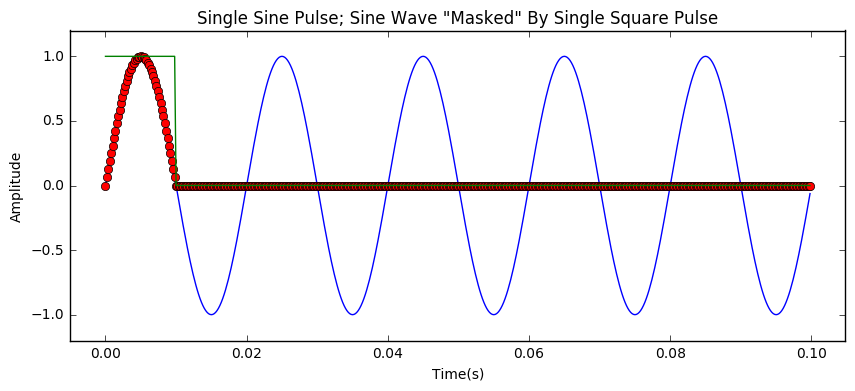

In [4]:
from quick import *
# The Square pulse is constructed (from the introduction) by:
tau=0.01
samp_rate=5000
sqrpulse=np.hstack((np.ones(int(tau*samp_rate)), np.zeros(int((0.1-tau)*samp_rate))))

# Using the parameters of the square pulse to create a sine wave,
#    and conducting an element-wise multiplication of the sine
#    wave by the square pulse, we get a single sine pulse
f0 = 1/(tau*2)           # Frequency of sine
tt = arange(0,len(sqrpulse))/float(samp_rate)   # Time axis
st = sin(2*pi*f0*tt)   # Sinewave, frequency f0

#...which we can plot...
sinpulse=st*sqrpulse
quickplot(tt,st,'-b',tt,sinpulse,'or',tt,sqrpulse,'g-','Single Sine Pulse; Sine Wave "Masked" By Single Square Pulse','Time(s)','Amplitude')

> ![2.A](2partA.png)
>
> ##### Characterize the differences between the rectangular and the sinusoidal pulse of width tau for different values of tau in the frequency domain.
>  For small Tau, the spectrum of the sine pulse is fairly spread out (compared to larger values) and the smaller subgroupings of higher-order sines (divided by the small periodic dips in the frequency spectrum) are wider than those of the larger Tau sine pulse. For large Tau, the spectrum of the sine pulse become more quickly attenuated at high frequencies and produce a very narrow peak at the center, but the spectrum's aforementioned "dips" are spaced closer togther. This is due to the fact that the contribution ffrom the very low order sine waves are much important inshaping the wide sine pulse than those used to shape the narrow sine pulse, which would eventually reach an evenly-distributed frequency spectrum as the pulse nears the limit of becoming a dirac delta impulse (zero width)
>
> ![2.A_small](2partA_smallTau.png)
> ![2.A_large](2partA_largeTau.png)

##### Part B)
Generate a signal with variable frequency

> 
> ![2B_1](2partB_1.png)
> See exercise003.grc to view the flowspace created for this exercise
> 
> ![2B_2](2partB_2.png)
>
> Faced with many methods in which to induce a phase shift into a given wave, I chose the direct (but obviously messy, as seen in the screenshot) method of directly adding a constant 120 degrees of phase to the "phase" part of the complex signal (using the complex-to-mag-phase converter). After discussing other strategies with my classmates, I discovered that a cleaner method may have been to inject a "Delay" block into the real part of the complex signal, thereby inducing a phase shift.

##### Part C)
Make an "Interpolating FIR Filter" in the script "ptfun.py"

> 
> ![2C](2partC.png)
> See exercise004.grc to view the flowspace created for this exercise
>
> Each interpolator was made by creating a pulse that was appropriately wide (for the rectangular pulse, sps ones were created to make a square pulse that was sps milliseconds wide; for the triangular pulse, a range of sps*2 points between 0 and 1 and back to 0 were spaced 1/sps apart; for the sinc pulse, a truncated sinc pulse that was 2*k*sps points wide was created). These arrays were fed into the interpolator which handled the arbitrarily sized arrays accordingly
>
> ![2C_rect](2partC_rect.png)
> ![2C_tri](2partC_tri.png)
> ![2C_sinc](2partC_sinc.png)
